# Lets Have some fun with CNNs!

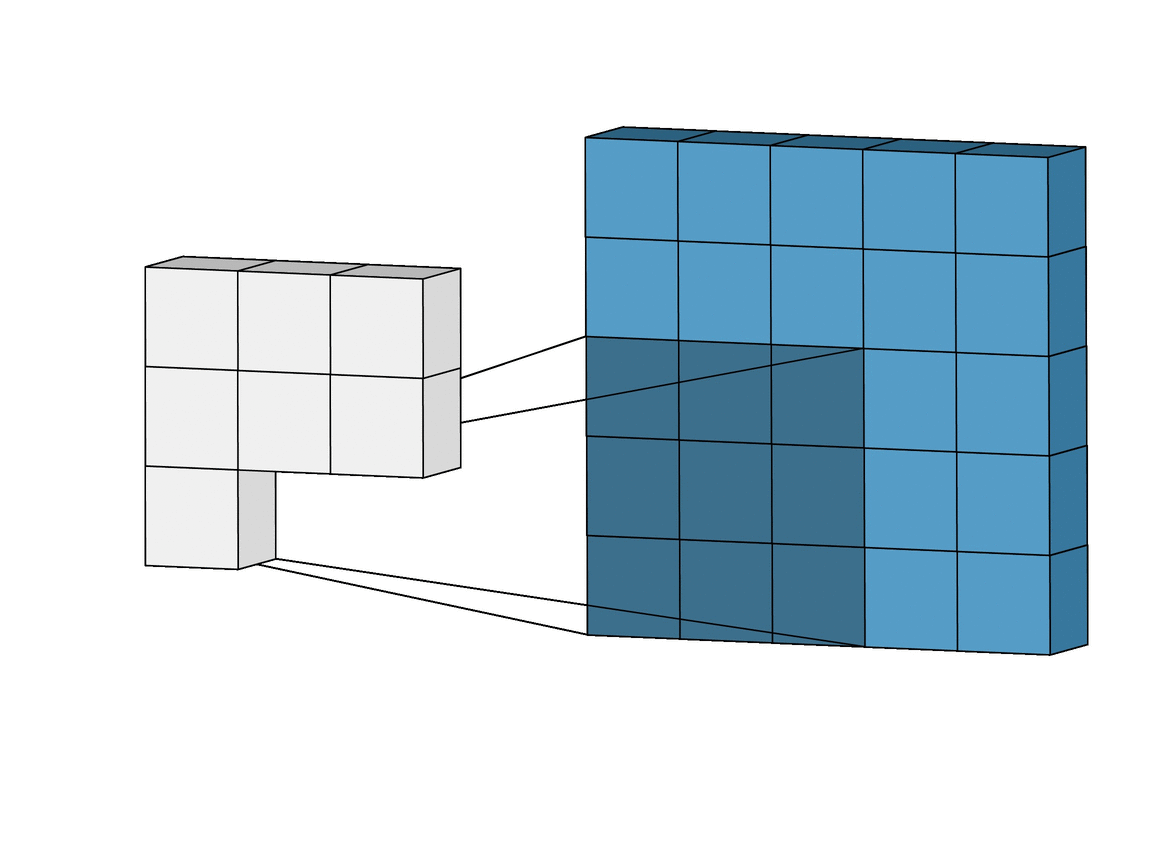

# What do CNNs do differently?

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

In [2]:
url = "https://upload.wikimedia.org/wikipedia/commons/7/73/2023_Toyota_Supra_%282%29.jpg"
response = requests.get(url)
img = Image.open(BytesIO(response.content))

In [5]:
def apply_sobel_filter(image):

    img_array = np.array(image, dtype=float)

    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

    height, width = img_array.shape

    gradient_x = np.zeros((height, width))
    gradient_y = np.zeros((height, width))

    for i in range(1, height-1):
        for j in range(1, width-1):
            patch = img_array[i-1:i+2, j-1:j+2]
            gradient_x[i, j] = np.sum(patch * sobel_x)
            gradient_y[i, j] = np.sum(patch * sobel_y)

    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

    gradient_x = (gradient_x - np.min(gradient_x)) / (np.max(gradient_x) - np.min(gradient_x))
    gradient_y = (gradient_y - np.min(gradient_y)) / (np.max(gradient_y) - np.min(gradient_y))
    gradient_magnitude = (gradient_magnitude - np.min(gradient_magnitude)) / (np.max(gradient_magnitude) - np.min(gradient_magnitude))

    return gradient_x, gradient_y, gradient_magnitude


In [6]:
def display_results(image, gradient_x, gradient_y, gradient_magnitude):
    fig, axes = plt.subplots(2, 2, figsize=(12, 12))


    axes[0, 0].imshow(image, cmap='gray')
    axes[0, 0].set_title('Original Image')
    axes[0, 0].axis('off')


    axes[0, 1].imshow(gradient_x, cmap='gray')
    axes[0, 1].set_title('Horizontal Edges (Sobel X)')
    axes[0, 1].axis('off')


    axes[1, 0].imshow(gradient_y, cmap='gray')
    axes[1, 0].set_title('Vertical Edges (Sobel Y)')
    axes[1, 0].axis('off')


    axes[1, 1].imshow(gradient_magnitude, cmap='gray')
    axes[1, 1].set_title('Edge Magnitude')
    axes[1, 1].axis('off')

    plt.tight_layout()
    plt.show()


In [7]:
if img.mode != 'L':
    img = img.convert('L')


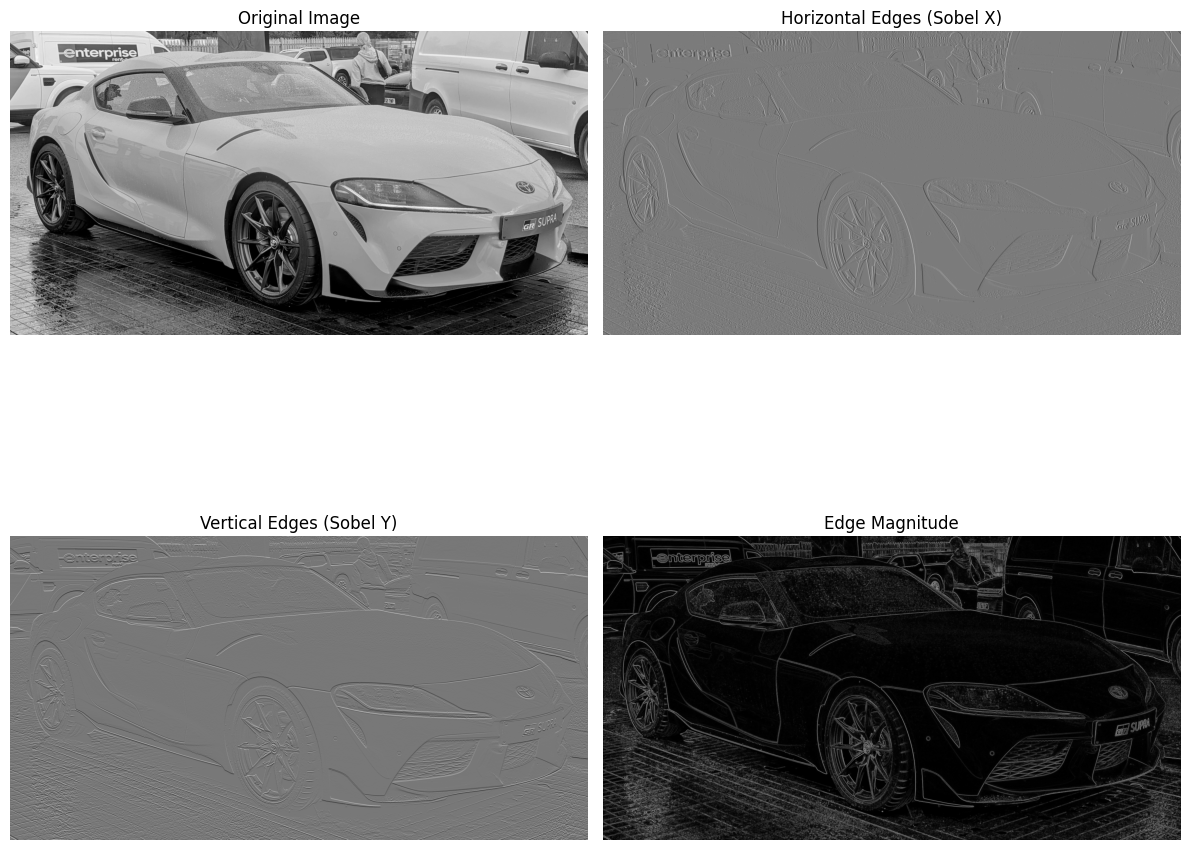

In [8]:
gradient_x, gradient_y, gradient_magnitude = apply_sobel_filter(img)
display_results(img, gradient_x, gradient_y, gradient_magnitude)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from scipy.signal import convolve2d
import time

In [ ]:
print("Loading MNIST dataset...")
(X_train, y_train), (_, _) = mnist.load_data()
X_train = X_train / 255.0

# Lets define our Kernels

Kernels sweep through the image and spply convolutions on it. This allows the system to detect localized patterns inherently present in the image.

[Here's a Great read on the same!](https://sbme-tutorials.github.io/2018/cv/notes/4_week4.html#edge-detection-kernels)

In [ ]:
# kernels = {
#     'Edge Detection':np.array([[-1, -1,-1], [-1, 8, -1], [-1, -1, -1]]),
#     # 'Vertical Lines': np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]),
#     'Vertical Lines': np.array([[-1, 2, -1], [-1, 2, -1], [-1, 2, -1]]),

#     'Blur':1/9*np.ones((3,3))
# }

kernels = {
    'Edge Detection':np.array([[-10, -10,-10], [-10, 80, -10], [-10, -10, -10]]),
    # 'Vertical Lines': np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]),
    'Vertical Lines': np.array([[-10, 20, -10], [-10, 20, -10], [-10, 20, -10]]),

    'Blur':1/9*np.ones((3,3))
}

# Now we define a function that applies the convolution on the image.



In [23]:
def apply_convolution(image, kernel):
    return convolve2d(image, kernel, mode='same')

In [24]:
def show_feature_maps(digit_idx=None):
    if digit_idx is None:
        digit_idx = np.random.randint(0, len(X_train))

    image = X_train[digit_idx]
    digit = y_train[digit_idx]

    fig, axes = plt.subplots(2, 4, figsize=(15, 8))
    fig.suptitle(f'CNN Feature Detection - MNIST Digit: {digit}', fontsize=16)

    axes[0, 0].imshow(image, cmap='gray')
    axes[0, 0].set_title('Original Image')
    axes[0, 0].axis('off')

    for idx, (name, kernel) in enumerate(kernels.items(), 1):
        axes[0, idx].imshow(kernel, cmap='coolwarm')
        axes[0, idx].set_title(f'Kernel: {name}')
        axes[0, idx].axis('off')

        result = apply_convolution(image, kernel)
        result = (result - result.min()) / (result.max() - result.min())

        axes[1, idx].imshow(result, cmap='gray')
        axes[1, idx].set_title(f'Feature Map')
        axes[1, idx].axis('off')

    axes[1, 0].axis('off')

    plt.tight_layout()
    plt.show()
    plt.close()

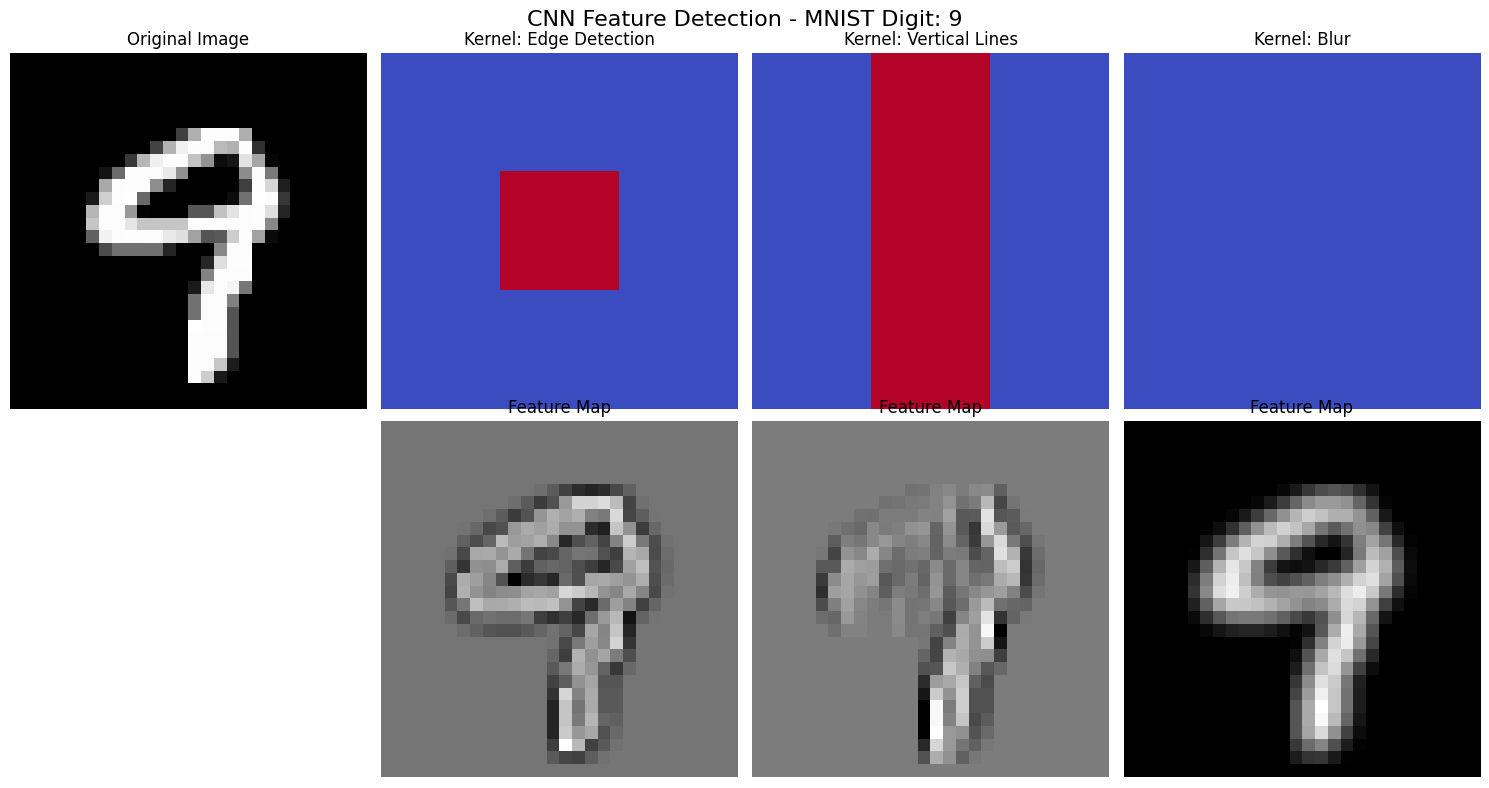

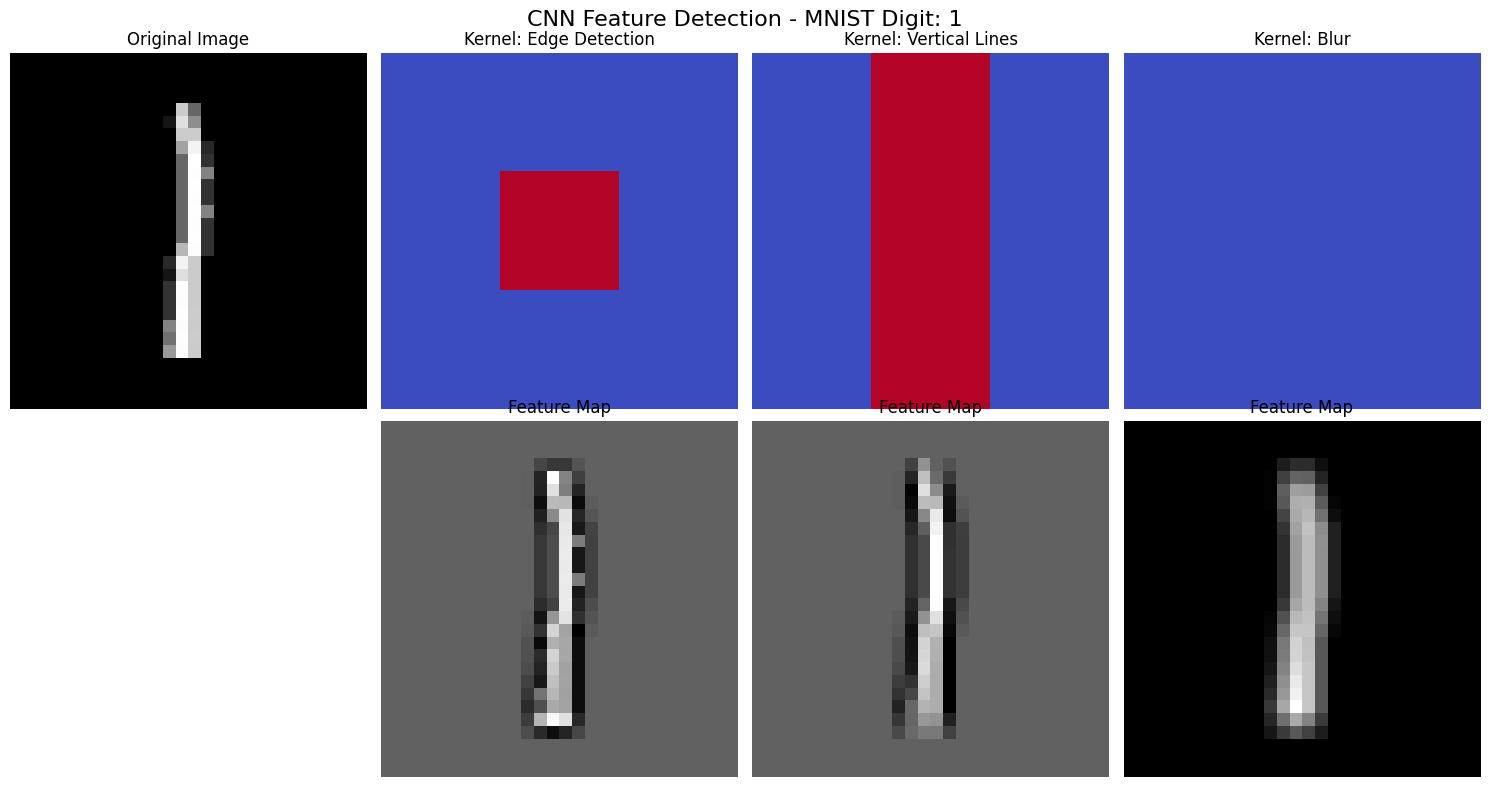

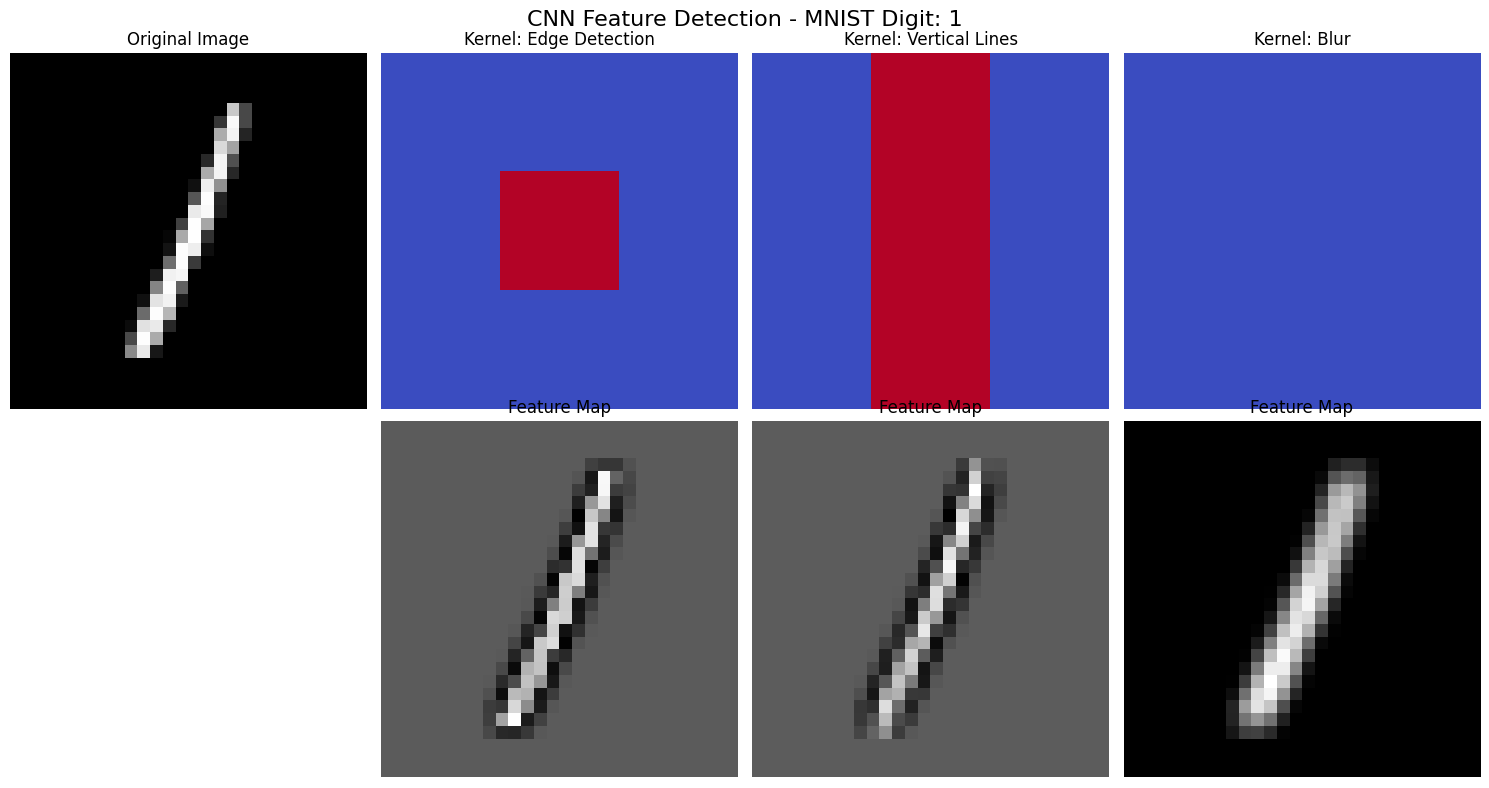

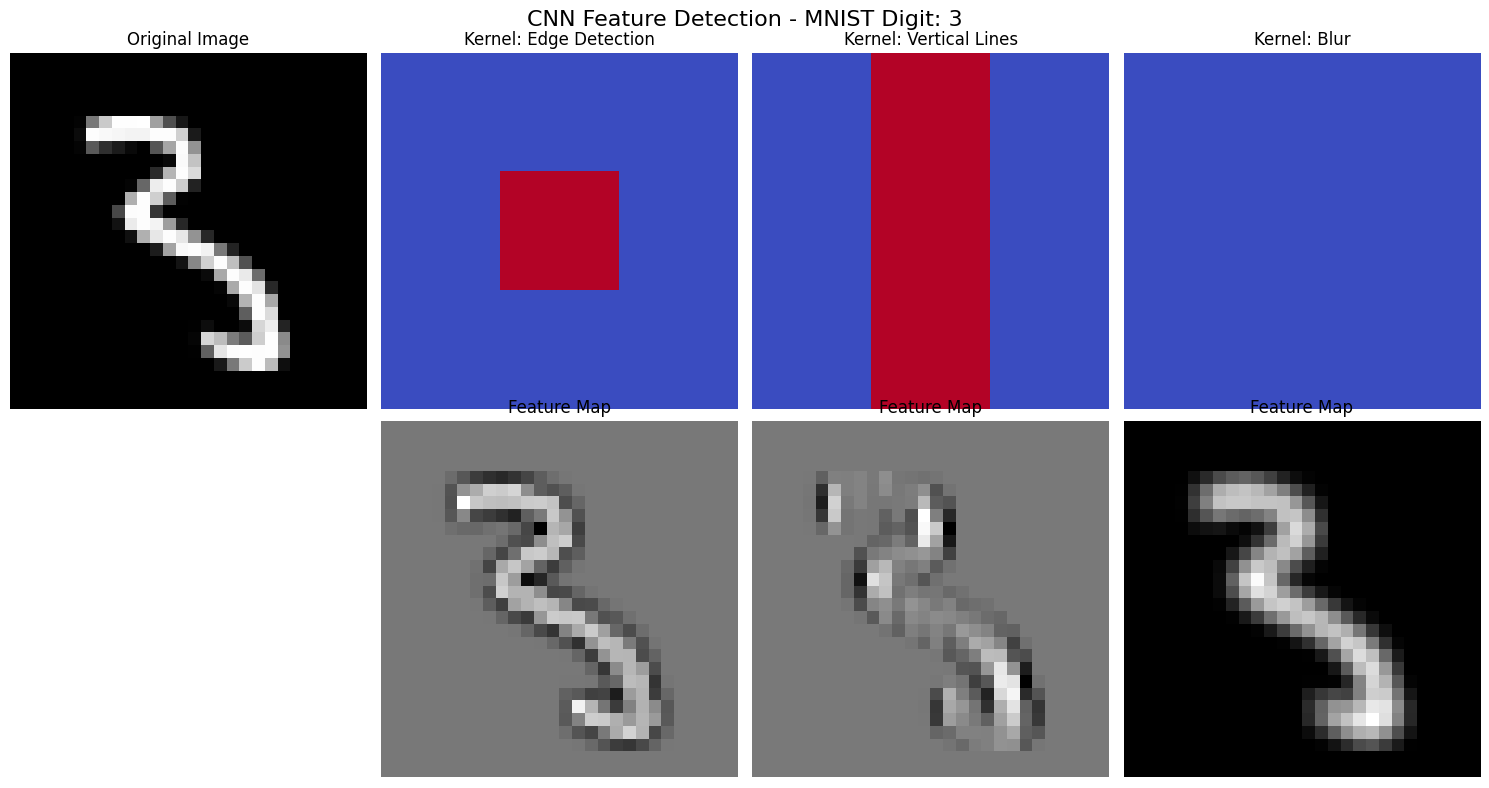

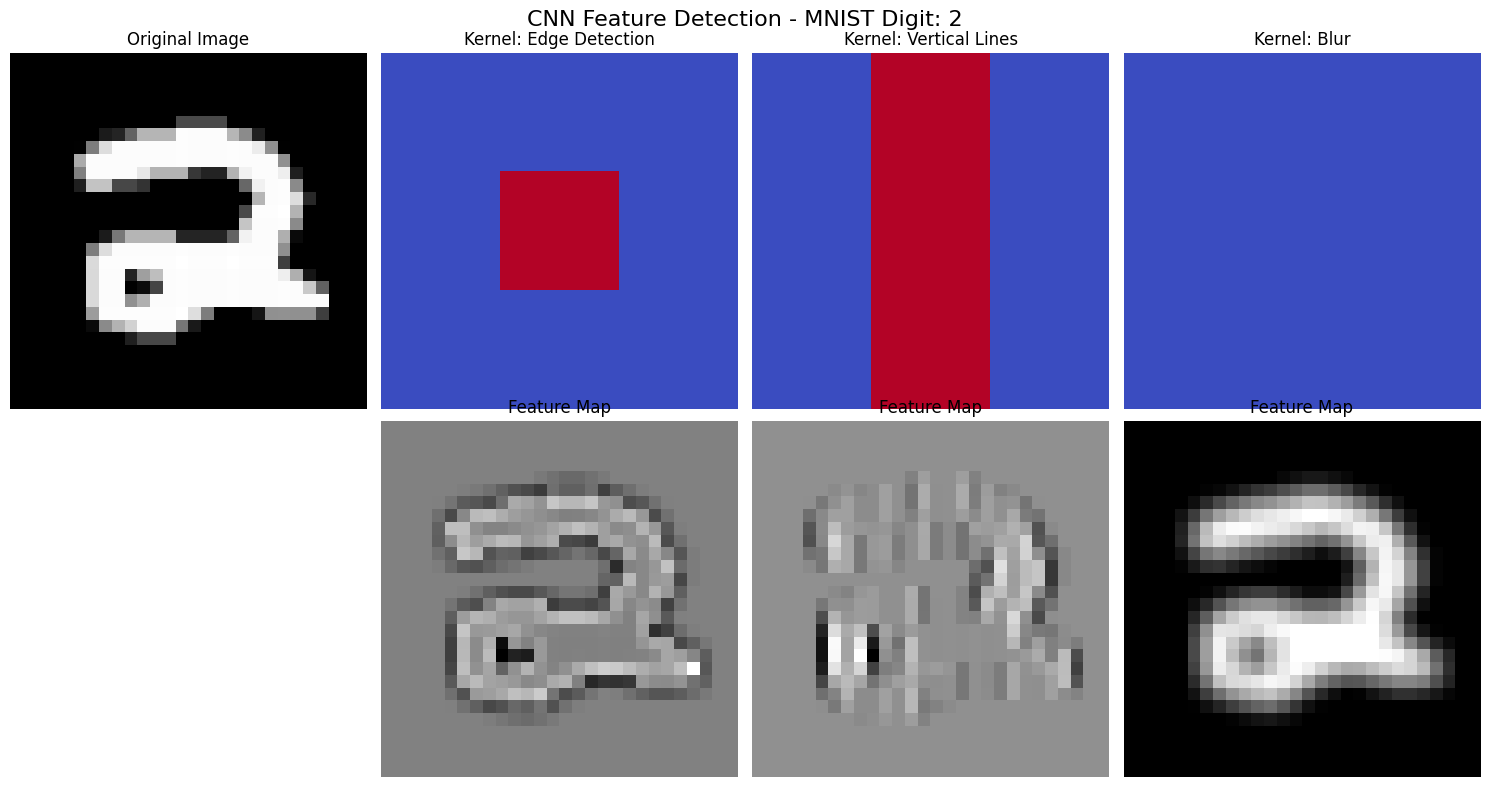

In [25]:
num_examples = 5
while num_examples > 0:
  show_feature_maps()
  time.sleep(2)
  num_examples -= 1

